# **HUMAN DEVELOPMENT INDEX**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
A=pd.read_csv('India.csv')    #fetching data

x1=np.arange(1990,2020)  #Year
x2=A.iloc[35:65,1]       #Life Expectancy at Birth
x3=A.iloc[65:95,1]       #Expected Years of Schooling
x4=A.iloc[95:125,1]      #Mean Years of Schooling
x5=A.iloc[125:155,1]     #Gross National Income Per Capita(2017 PPP$)

y=A.iloc[5:35,1]         #Human Development Index(value)

In [ ]:
#convert all data to numpy array for further application
x2=np.array(x2)
x3=np.array(x3)
x4=np.array(x4)
x5=np.array(x5)
y=np.array(y)
print(x1.shape,x2.shape,x3.shape,x4.shape,x5.shape,y.shape)

(30,) (30,) (30,) (30,) (30,) (30,)


In [ ]:
x1=x1.reshape(30,1)
x2=x2.reshape(30,1)
x3=x3.reshape(30,1)
x4=x4.reshape(30,1)
x5=x5.reshape(30,1)
x_1=np.append(x1,x2,axis=1)
x_2=np.append(x3,x4,axis=1)
x_3=np.append(x_1,x_2,axis=1)
x=np.append(x_3,x5,axis=1)

In [ ]:
#INDEPENDENT VARIABLES
print(x.shape)
x       #contains five columns(year,life expectancy at birth,Expected Years of Schooling,Mean Years of Schooling,Gross National Income Per Capita(2017 PPP$))

(30, 5)


array([[1990, '57.865', '7.634806667', '2.96', '1787.071411'],
       [1991, '58.353', '7.744633333', '3.07', '1765.563014'],
       [1992, '58.851', '7.85446', '3.18', '1825.445774'],
       [1993, '59.349', '7.964286667', '3.29', '1877.489962'],
       [1994, '59.84', '8.074113333', '3.4', '1966.185824'],
       [1995, '60.32', '8.18394', '3.51', '2078.120867'],
       [1996, '60.783', '8.20939', '3.69', '2196.976893'],
       [1997, '61.233', '8.24335', '3.87', '2245.35313'],
       [1998, '61.669', '8.274683333', '4.05', '2340.792988'],
       [1999, '62.093', '8.306016667', '4.23', '2504.371442'],
       [2000, '62.505', '8.33735', '4.41', '2548.048438'],
       [2001, '62.907', '8.3659', '4.492', '2630.025182'],
       [2002, '63.304', '8.55608', '4.574', '2689.210763'],
       [2003, '63.699', '9.15097', '4.656', '2851.163987'],
       [2004, '64.095', '9.4142975', '4.738', '3028.796756'],
       [2005, '64.5', '9.677625', '4.82', '3216.752351'],
       [2006, '64.918', '9.94095

In [ ]:
#DEPENDENT VARIABLE
y

array(['0.429', '0.433', '0.44', '0.446', '0.453', '0.461', '0.468',
       '0.474', '0.481', '0.489', '0.495', '0.499', '0.506', '0.518',
       '0.527', '0.536', '0.546', '0.555', '0.563', '0.569', '0.579',
       '0.588', '0.597', '0.604', '0.616', '0.624', '0.63', '0.64',
       '0.642', '0.645'], dtype=object)

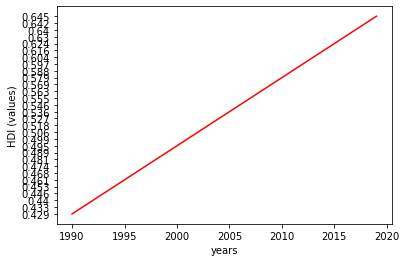

In [ ]:
plt.plot(x1,y,color="red")
plt.xlabel("years")
plt.ylabel("HDI (values)")
plt.show()

In [ ]:
#loading testing data and training data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
print(x_train.shape,x_test.shape)       #here we split feature in 30% test set and 70% train set

(21, 5) (9, 5)


In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score

model=linear_model.LinearRegression()

In [ ]:
"""
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state = 0)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
print("mean squared error is:",mean_squared_error(y_test,y_pred))
print("r2 score is:",r2_score(y_test,y_pred))
"""
#we got accuracy of 97.42% using decision tree regressor model.

mean squared error is: 7.85555555555557e-05
r2 score is: 0.9742542929742501


In [ ]:
"""
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators =10, random_state = 0)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
print("mean squared error is:",mean_squared_error(y_test,y_pred))
print("r2 score is:",r2_score(y_test,y_pred))
"""
#we got accuracy of 98.91% using random forst regressor model.

mean squared error is: 3.333444444444403e-05
r2 score is: 0.9890750076877014


In [ ]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_train_pred=model.predict(x_train)
print("mean squared error is:",mean_squared_error(y_test,y_pred))     #L2 loss function also used to give idea about accuracy of model
print("r2 score is:",r2_score(y_test,y_pred))

mean squared error is: 1.3699938980631115e-06
r2 score is: 0.9995509997825468


In [ ]:
y_1=np.append(y_test.reshape(9,1),y_pred.reshape(9,1),axis=1)    #left column contains the actual values and right column contains the predicted values
y_1

array([['0.555', 0.5535123455650819],
       ['0.588', 0.5867848188935625],
       ['0.495', 0.49427823174554675],
       ['0.569', 0.5673977341486545],
       ['0.527', 0.5272898879827119],
       ['0.579', 0.5771385459883644],
       ['0.63', 0.629572035655678],
       ['0.446', 0.44734880686027356],
       ['0.616', 0.6160218967025521]], dtype=object)

In [ ]:
years=x_train[:,0]
years

array([2012, 2013, 1994, 1992, 2015, 1996, 2008, 2003, 1997, 2017, 1991,
       2006, 1990, 2005, 2019, 2018, 1999, 1998, 2002, 2001, 1995],
      dtype=object)

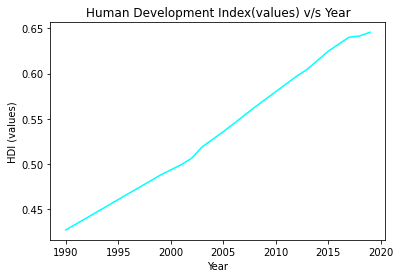

In [ ]:
key={}
for i in range(years.shape[0]):
  key[years[i]] = y_train_pred[i]

final = {}
for i in sorted(key):
  final[i] = key[i]


plt.plot(list(final.keys()),list(final.values()), color='cyan')
plt.title("Human Development Index(values) v/s Year")
plt.xlabel("Year")
plt.ylabel("HDI (values)")
plt.show()

# ***Finally we are successful in implementing the Linear Regression model and obtain negligible mean squared error and an accuracy of 99.95% to predict HDI of India.***
